In [1]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm


raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\spettro_am\spettro_Am_900mm2.dat")

data1 = []

for i in range(len(raw_data)):
    for j in range(int(raw_data[i])):
        data1.append(i)

data = np.array(data1)

signal = []

for i in range(len(data)):
    if data[i] > 4940 and data[i] < 4975 : signal.append(data[i])

#4400, 6000

tot = 4975 - 4940

#plt.hist(signal)

def model(x, N1, mu1, sigma1):
    return N1*norm.cdf(x, loc = mu1, scale = sigma1)
N1_ext = 0
N2_ext = 0

for i in range(4950, 5000): #picco1 (più a dx)
    N1_ext = N1_ext + raw_data[i]
for i in range(4850, 4950): #picco2
    N2_ext = N2_ext + raw_data[i]
    
numbins=[]
chi2=[]

    
for nbins in range(10, 100):
       
    bin_content, bin_edges = np.histogram(signal, bins = nbins)
    N_events = sum(bin_content)
    
    costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
    my_minuit = Minuit(costf, N1 = N1_ext, mu1 = 4950 , sigma1 = 10)
    my_minuit.migrad()
        
        
    #print(my_minuit.valid, my_minuit.fmin.reduced_chi2)
    if ((my_minuit.valid == True) and (my_minuit.fval/my_minuit.ndof > 0 )):
        chi2.append(my_minuit.fval/my_minuit.ndof)
        numbins.append(nbins)
        #display(my_minuit)


index = np.array(chi2).argmin() #dove c'è il fit migliore

    
nbins = numbins[index]
    
bin_content, bin_edges = np.histogram(signal, bins = nbins)
    
N_events = sum(bin_content)
    
costf = ExtendedBinnedNLL(bin_content, bin_edges, model)
    
my_minuit = Minuit(costf, N1 = N1_ext, mu1 = 4950 , sigma1 = 10)
    
my_minuit.migrad()
my_minuit.hesse()
display(my_minuit)
print(nbins)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 111.1 (χ²/ndof = 3.6)      │              Nfcn = 108              │
│ EDM = 1.27e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name   │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ N1     │  312.6e3  │   1.0e3   │            │            │         │         │       │
│ 1 │ mu1    │ 4.95543e3 │ 0.00004e3 │            │            │         │         │       │
│ 2 │ sigma1 │   12.92   │   0.06    │            │            │         │         │       │
└───┴────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────────┬────────────────────────────┐
│        │       N1      mu1   sigma1 │
├────────┼────────────────────────────┤
│     N1 │ 1.09e+06 -15.5413  48.8715 │
│    mu1 │ -15.5413  0.00177  -0.0009 │
│ sigma1 │  48.8715  -0.0009  0.00347 │
└────────┴────────────────────────────┘

34


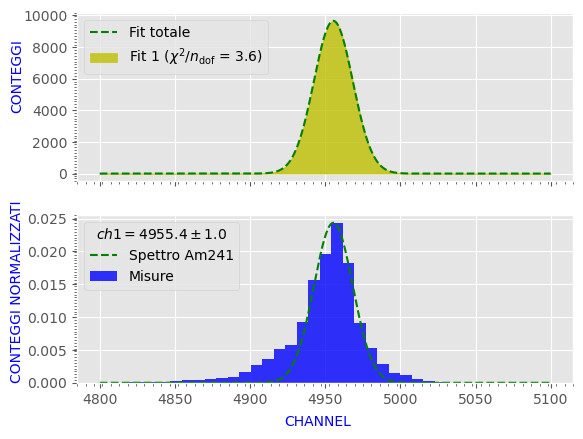

In [9]:
A1 = my_minuit.values["N1"]
mu1 = my_minuit.values["mu1"]
sigma1 = my_minuit.values["sigma1"]

raw_data2 = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\spettro_am\spettro_Am_900mm2.dat")

data2 = []

for i in range(len(raw_data2)):
    for j in range(int(raw_data2[i])):
        data2.append(i)

data_real = np.array(data2)

signal2 = []

for i in range(len(data_real)):
    if data_real[i] > 4800 and data_real[i] < 5100 : signal2.append(data[i])

bin_content, bin_edges = np.histogram(signal2, bins = nbins)
N_events = sum(bin_content)

import matplotlib.ticker as ticker

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
plt.style.use("ggplot")

ax1.xaxis.set_minor_locator(ticker.LinearLocator(60))
ax1.yaxis.set_minor_locator(ticker.LinearLocator(60))
ax2.xaxis.set_minor_locator(ticker.LinearLocator(60))
ax2.yaxis.set_minor_locator(ticker.LinearLocator(60))
fig.text(0.5, 0.02, 'CHANNEL', ha='center', color="b")
fig.text(0.02, 0.75, 'CONTEGGI', va='center', rotation='vertical', color="b")
fig.text(0.02, 0.30, 'CONTEGGI NORMALIZZATI', va='center', rotation='vertical', color="b")

x=np.linspace(4800, 5100, 2000)
x1 = np.linspace(4940, 4975, 2000)
x1=np.linspace(4800, 5100, 2000)
func= lambda x, N, m, s: N*norm.pdf(x, loc=m, scale=s)

#plt.xlim(4850, 5000)

ax2.plot(x, 1/N_events*func(x, my_minuit.values[0], my_minuit.values[1], my_minuit.values[2]), linestyle="--", color="g", label="Spettro Am241")
ax2.hist(signal2, bins=nbins, label="Misure", alpha=.8, color="b", density=True)

ax2.grid("on")


ax1.plot(x, func(x, my_minuit.values[0], my_minuit.values[1], my_minuit.values[2]), linestyle="--", color="g", label="Fit totale")

ax1.fill_between(x1, func(x1, my_minuit.values[0], my_minuit.values[1], my_minuit.values[2]), where=(func(x1, my_minuit.values[0], my_minuit.values[1], my_minuit.values[2]) > 0), color="y", label="Fit 1 ("f"$\\chi^2$/$n_\\mathrm{{dof}}$ = {my_minuit.fmin.reduced_chi2:.1f})", alpha=.8)
#ax2.fill_between(x2, func(x2, my_minuit.values[3], my_minuit.values[4], my_minuit.values[5]), where=(func(x2, my_minuit.values[3], my_minuit.values[4], my_minuit.values[5]) > 0), color="r", label="Fit 2", alpha=.6)

ax1.grid("on")

fit_info = []

fit_info.append(f"$ch1 = {my_minuit.values["mu1"]:.1f} \\pm {tot/nbins:.1f}$")


ax2.legend(title="\n".join(fit_info), frameon=True, loc="upper left")
ax1.legend(frameon=True, loc="upper left")
plt.show()
#print(N1_ext)

In [11]:
# da calibrazione
#En(ch) = a * ch + b

a = 1.10e-3
erra = .08e-3


En_Am1= a*my_minuit.values["mu1"] #En picco a dx (più alto)
err1 = En_Am1*np.sqrt((tot/nbins/my_minuit.values["mu1"])**2+(erra/a)**2)

E1_exp = 5.486 #in Mev
E2_exp = 5.443
E3_exp = 5.389

print(f" En +- err \t\t E aspettata \t Offset \t\t %Exp \t %Mis")

print(f' {En_Am1:.5f} +- {err1:.5f} \t {E1_exp:.5f} \t {En_Am1-E1_exp:.3f} +- {err1:.3f} \t 86 \t {(my_minuit.values["N1"]) /N_events*100:.1f} \n  ')


#{En_Am2:.5f} +- {err2:.5f} \t {E2_exp:.5f} \t {En_Am2-E2_exp:.3f} \t\t 12.5 \t {my_minuit.values["N2"] /N_events*100:.1f}\n
#print(my_minuit.values["N1"]/N_events, my_minuit.values["N2"]/N_events, my_minuit.values["N3"]/N_events)
#{En_Am3:.5f} +- {err3:.5f} \t {E3_exp:.5f} \t {En_Am3-E3_exp:.3f} \t\t 1 \t {my_minuit.values["N3"] /N_events*100:.1f}\n')

 En +- err 		 E aspettata 	 Offset 		 %Exp 	 %Mis
 5.45097 +- 0.39644 	 5.48600 	 -0.035 +- 0.396 	 86 	 78.9 
  
